In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime as dt, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
mes = Base.classes.measurement
stat = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

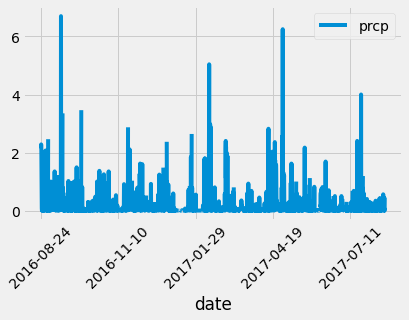

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


precip_last =session.query(mes.date).order_by(mes.date.desc()).first()
p2 = dt.strptime(precip_last[0], "%Y-%m-%d") - timedelta(days=365)
mes1 =session.query(mes.date,mes.prcp).filter(mes.date>p2)
mes_db = pd.DataFrame(mes1).sort_values("date")
mes_db.set_index('date',inplace=True)
mes_db.plot.line()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
mes_db.head()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mes_mean = mes_db['prcp'].mean()
mes_med = mes_db['prcp'].median()
mes_min = mes_db['prcp'].min()
mes_max = mes_db['prcp'].max()
print(f"The average daily precip in Hawaii is {mes_mean}, median {mes_med}, min {mes_min}, and max {mes_max} ")

The average daily precip in Hawaii is 0.17646153846153845, median 0.02, min 0.0, and max 6.7 


In [12]:
# Design a query to show how many stations are available in this dataset?
statn = session.query(stat.name).count()
print(f"there are {statn} stations")

there are 9 stations


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [mes.station, func.count(mes.station)]
counter = session.query(*sel).group_by(mes.station).order_by(func.count(mes.station).desc())
cdb = pd.DataFrame(counter,columns=['measurment_station','count_1'])
cdb

,measurment_station,count_1
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel2 = [mes.station, func.min(mes.tobs),func.max(mes.tobs),func.avg(mes.tobs)]
counter2 = session.query(*sel2).filter(mes.station=='USC00519281').group_by(mes.station)
cdb2 = pd.DataFrame(counter2,columns=['measurment_station','min_1','max_1','avg_1'])
cdb2

,measurment_station,min_1,max_1,avg_1
0,USC00519281,54.0,85.0,71.663781


<function matplotlib.pyplot.show(*args, **kw)>

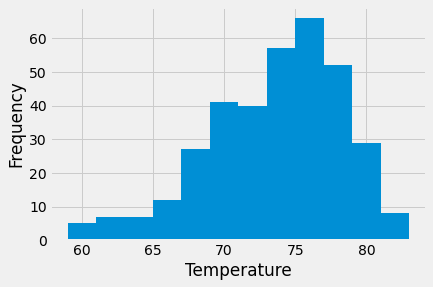

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mes10 =session.query(mes.date,mes.tobs).filter(mes.date>p2).filter(mes.station=='USC00519281')
cdb3 = pd.DataFrame(mes10)
cdb3
plt.hist(cdb3[('tobs')],density=False, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
